In [1]:
%matplotlib notebook
import numpy as np
import os, sys
import h5py
import pandas as pd
import matplotlib.pyplot as plt

import readdata as rd

import datetime
time_origin = datetime.datetime(2013,1,1,0,0,0)
sys.path.append('/Users/ajc/Desktop/ATS/ats-repo/ats/tools/utils/')

In [2]:
ex = pd.ExcelFile('/Users/ajc/Desktop/ATS/barrow-polygon-data/water_table/NGEE_wells/RevisedNEAR-FINAL-WaterLevels-NGEESiteCNorthPolygon-AC01_29_2015.xlsx')
DataC37 = ex.parse(sheet_name='C37',skiprows=4)
ex.close()

DataC37[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC37[u"Date2013"]])
DataC37['WL'] = np.array([wl - 4.72*0 for wl in DataC37['Water Level 2013']])
#print (DataC37['time'][0])
ex = pd.ExcelFile('/Users/ajc/Desktop/ATS/barrow-polygon-data/water_table/NGEE_wells/RevisedNEAR-FINAL-WaterLevels-NGEESiteCNorthPolygon-AC01_29_2015.xlsx')
DataC40 = ex.parse(sheet_name='C40',skiprows=4)
DataC39 = ex.parse(sheet_name='C39',skiprows=4)
DataC41 = ex.parse(sheet_name='C41',skiprows=4)
DataC42 = ex.parse(sheet_name='C42',skiprows=4)
DataC43 = ex.parse(sheet_name='C43',skiprows=4)
ex.close()


DataC40[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC40[u"Date 2013"]])
DataC40['WL'] = np.array([wl - 4.91*0 for wl in DataC40['Water Level 2013']])
DataC39['WL'] = np.array([wl - 4.81*0 for wl in DataC39['Water Level 2013']])
DataC41['WL'] = np.array([wl - 4.71*0 for wl in DataC41['Water Level 2013']])
DataC42['WL'] = np.array([wl - 4.64*0 for wl in DataC42['Water Level 2013']])
DataC43['WL'] = np.array([wl - 4.71*0 for wl in DataC43['Water Level 2013']])

DataC39[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC39[u"Date 2013"]])
DataC41[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC41[u"Date 2013"]])
DataC42[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC42[u"Date 2013"]])
DataC43[u'time'] = np.array([(t - time_origin).total_seconds()/86400. for t in DataC43[u"Date 2013"]])

148.625


In [16]:
#simulation = 'CrunB12R'
simulation = 'CrunB42R12'
infile = "/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/surface-water_level-C37.dat"%simulation
Data37 = rd.ReadSingleFile(infile)
Data37['time'] = [d/86400. for d in Data37['time']] 
Data37['data'] = [d - 4.83541*0 for d in Data37['data']]
print (infile)
#infile = "/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/CrunB3R/surface-water_level-C37-ngbr.dat"
#Data37N = rd.ReadSingleFile(infile)
#Data37N['time'] = [d/86400. for d in Data37N['time']] 
#Data37N['data'] = [d - 4.83541 for d in Data37N['data']]

infile = "/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/surface-water_level-C40.dat"%simulation
Data40 = rd.ReadSingleFile(infile)
Data40['time'] = [d/86400. for d in Data40['time']] 
Data40['data'] = [d - 4.87831*0 for d in Data40['data']]

/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/CrunB42R12/surface-water_level-C37.dat


In [17]:
import plot_water_table2D
times, wt, wt_ss, wt_bottom,thaw_depth = plot_water_table2D.water_table('/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/'%simulation)

('Datum (surface elevation)', array([4.81032612]))


In [7]:
lower_point = 4.8284937 
lower_point=  4.80342948 # new mesh
lower_point = 4.81031227 # new smooth mesh

In [8]:
cellid = 36
cellid = 44 # new mesh
metdata = rd.GetSurfVarFromVis('/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/visdump_surface_data.h5'%simulation, 'surface-precipitation_rain', cellid=cellid)
surftemp = rd.GetSurfVarFromVis('/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/visdump_surface_data.h5'%simulation, 'surface-temperature', cellid=cellid)
#plt.plot(metdata['surface-precipitation_rain'])
#plt.show()

In [9]:
rain = [d *100*900./0.02500 for d in metdata['surface-precipitation_rain']]
E1 = 4.72  + 0.075 * np.exp(rain)
#plt.plot(Data37['time'], Data37['data'], 'k', label='Simulated')
#plt.plot(DataC37['time'], DataC37['WL'],'r', label='Observed (C37)')

#plt.plot(Data37['time'],E1,'*')
#plt.show()
#simulation1 = 'CrunB30R79'
#times1, wt1, wt_ss1, wt_bottom1,thaw_depth1 = plot_water_table2D.water_table('/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaC/%s/'%simulation1)

In [18]:
Data40 =dict()
time = [t*365.25 for t in times]
#time = [t for t in times]
Data40['time'] = time
Data40['wt'] = wt
Data40['wt_ss'] = wt_ss
Data40['wt_bottom'] = wt_bottom
print (times[0:3])
        
D1 = []
T1 = []
for i,d in enumerate(Data40['wt']):
    if d != 0:
        D1.append(d + lower_point)
        T1.append(Data40['time'][i])
        
D2 = []
T2 = []
for i,d in enumerate(Data40['wt']):
    D2.append(d + lower_point)
    T2.append(Data40['time'][i])
    
#water table bottom
D3 = []
T3 = []
for i,d in enumerate(Data40['wt_bottom']):
    D3.append(d + lower_point)
    T3.append(Data40['time'][i])
TD = []
for d in thaw_depth:
    TD.append(d + lower_point)   

"""
# Second simulation
Data401 =dict()
time1 = [t*365.25 for t in times]
Data401['time'] = time1
Data401['wt'] = wt1
Data401['wt_ss'] = wt_ss1
Data401['wt_bottom'] = wt_bottom1
        
D11 = []
T11 = []
for i,d in enumerate(Data401['wt']):
    if d != 0:
        D11.append(d + lower_point)
        T11.append(Data401['time'][i])
        
    
#water table bottom
D31 = []
T31 = []
for i,d in enumerate(Data401['wt_bottom']):
    D31.append(d + lower_point)
    T31.append(Data401['time'][i])
TD1 = []
for d in thaw_depth1:
    TD1.append(d + lower_point) 
"""

[0.40691307 0.40694159 0.40697011]


"\n# Second simulation\nData401 =dict()\ntime1 = [t*365.25 for t in times]\nData401['time'] = time1\nData401['wt'] = wt1\nData401['wt_ss'] = wt_ss1\nData401['wt_bottom'] = wt_bottom1\n        \nD11 = []\nT11 = []\nfor i,d in enumerate(Data401['wt']):\n    if d != 0:\n        D11.append(d + lower_point)\n        T11.append(Data401['time'][i])\n        \n    \n#water table bottom\nD31 = []\nT31 = []\nfor i,d in enumerate(Data401['wt_bottom']):\n    D31.append(d + lower_point)\n    T31.append(Data401['time'][i])\nTD1 = []\nfor d in thaw_depth1:\n    TD1.append(d + lower_point) \n"

<IPython.core.display.Javascript object>


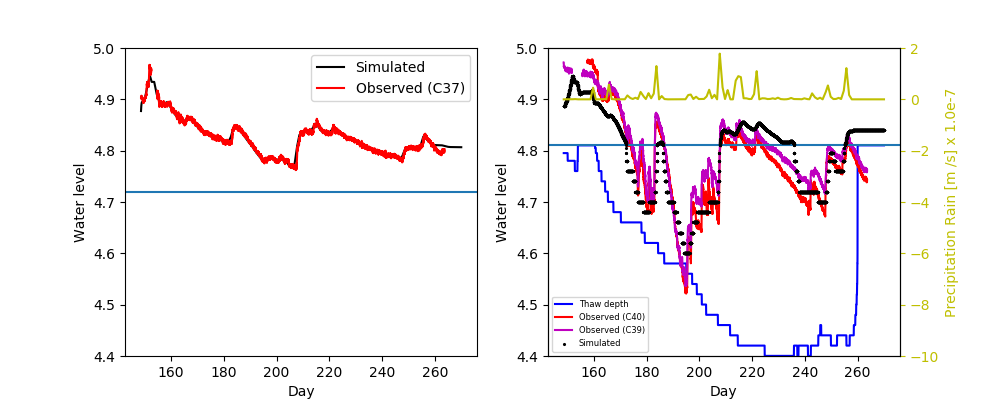

(11038, 11038)


In [19]:
outpath = '/Users/ajc/AllPostProcessData/BarrowTransect/Aug13-NewTC/'
fig, axs = plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.plot(Data37['time'], Data37['data'], 'k', label='Simulated')
plt.plot(DataC37['time'], DataC37['WL'],'r', label='Observed (C37)')
plt.axhline(y=4.72)
#plt.plot(Data37['time'], Data37N['data'], 'm')
plt.xlabel('Day')
plt.ylabel('Water level')
plt.ylim((4.4,5.0))
plt.legend()


print (len(DataC39['time']), len(DataC39['WL']))
ax1 = plt.subplot(122)

plt.plot(Data40['time'], TD,'b', label='Thaw depth')
#plt.plot(Data401['time'], TD1,'c', label='Thaw depth (uf TC)') # 2nd simulation
plt.plot(DataC40['time'], DataC40['WL'],'r', label='Observed (C40)')
plt.plot(DataC39['time'], DataC39['WL'],'m', label='Observed (C39)')
plt.axhline(y=lower_point)
plt.plot(T1, D1,'k.',markersize='2.5',label='Simulated')
#plt.plot(T11, D11,'c.',markersize='2.5',label='Simulated (uf TC)') #2nd simulation


#plt.plot(T3, D3,'c',markersize='2.5',label='WT bottom')

#plt.plot(DataC41['time'], DataC41['WL'],'g', label='Observed (C41)')
#plt.plot(DataC42['time'], DataC42['WL'],'c', label='Observed (C42)')
#plt.plot(DataC43['time'], DataC43['WL'],'k', label='Observed (C43)')



plt.xlabel('Day')
plt.ylabel('Water level')
plt.legend(loc='lower left',fontsize=6)
plt.ylim((4.4,5.0))

ax2 = ax1.twinx()
rain = [d*1.e7 for d in metdata['surface-precipitation_rain']]
#temp = [d*1.e0 for d in surftemp['surface-temperature']]
ax2.plot(Data40['time'],rain,'y')
ax2.set_ylabel('Precipitation Rain [m /s] x 1.0e-7',color='y')
ax2.tick_params('y', colors='y')
ax2.set_ylim([-10.0, 2])


plt.savefig(outpath+'%s-transectB-C40-C39.pdf'%simulation, dpi=200)
#plt.savefig(outpath+'%s-transectB-C40-C39-TC-comp.pdf'%simulation, dpi=200)
plt.show()



In [ ]:
# Area B
fig,axs = plt.subplots(1,2, figsize=(14,6))
#fig.subplots_adjust(hsapce=0.2,wspace=0.2)
plt.subplot(121)
infile = "/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaB/Brun2R/surface-water_level-B64.dat"
Data64 = rd.ReadSingleFile(infile)
z_sim = 5.13042
Data64['time'] = [d/86400. for d in Data64['time']]
Data64['data'] = [(d - z_sim)*1 for d in Data64['data']]

ex = pd.ExcelFile('/Users/ajc/Desktop/ATS/barrow-polygon-data/water_table/NGEE_wells/RevisedNEAR-FINALWaterLevels-NGEESiteB-AC 01_28_2015.xlsx')
#print (ex.sheet_names)
DataB64EX = ex.parse(sheet_name='B64', skiprows=4)
print (DataB64EX.keys())
#DataB64EX = np.array(DataB64EX['Water Level 2013'])
#print (DataB64)
DataB64 = dict()
r = len(DataB64EX['Water Level 2013'])
DataB64['water_level'] = [(d - 4.99)*1 for d in DataB64EX[u'Water Level 2013']]
DataB64['time'] = [(t-time_origin).total_seconds()/86400. for t in DataB64EX['Date2013']]

l= len(DataB64)
plt.plot(Data64['time'], Data64['data'], 'k', label='Simulated')
#print (len(DataB64), len(Data['data'][:l]))
plt.plot(DataB64['time'], DataB64['water_level'],'r', label='Observed B64')
plt.xlabel('Days')
plt.ylabel('Water Depth [m]')
plt.legend()

# B67

plt.subplot(122)
infile = "/Users/ajc/Projects/ATS-Data/OR-CONDO/mytests-orhydra/Barrow/polygon-slice/AreaB/Brun2R/surface-water_level-B67.dat"
Data67 = rd.ReadSingleFile(infile)
z_sim = 5.50947
Data67['time'] = [d/86400. for d in Data67['time']]
Data67['data'] = [(d - z_sim)*1 for d in Data67['data']]

ex = pd.ExcelFile('/Users/ajc/Desktop/ATS/barrow-polygon-data/water_table/NGEE_wells/RevisedNEAR-FINALWaterLevels-NGEESiteB-AC 01_28_2015.xlsx')
print (ex.sheet_names)
DataB67EX = ex.parse(sheet_name='B67', skiprows=4)

#DataB67['water_level'] = np.array(DataB67EX['Water Level 2013'])
DataB67= dict()
DataB67['water_level'] = [(d - 5.44)*1 for d in DataB67EX[u'Water Level 2013']]
DataB67['time'] = [(t - time_origin).total_seconds()/86400. for t in DataB67EX['Date2013']]
print (DataB67['water_level'][:5], DataB67['time'][:5])
plt.plot(Data67['time'], Data67['data'], 'k', label='Simulated')
plt.plot(DataB67['time'], DataB67['water_level'],'r', label='Observed B67')
plt.xlabel('Days')
plt.ylabel('Water Depth [m]')
#plt.legend()

#plt.savefig('polygonAreaB-B64.pdf', dpi=200)
plt.show()
"""
for i in range(len(DataB67['water_level'])):
    if DataB67['water_level'][i] is not 'nan':
        print (i, DataB67['time'][i], DataB67['water_level'][i])
"""